# Project 7: Predictive Machine Learning  
**Author:** Stacey Olson  
**Date:** October 2025  
**Repository:** [datafun-07-ml](https://github.com/staceyolson23-blip/datafun-07-ml)

---

## 📘 Project Description
This project introduces **Predictive Machine Learning** using **simple linear regression** to build, visualize, and interpret supervised learning models.

Through a series of guided exercises from *Intro to Python for Computer Science and Data Science*, we will:

- Build linear regression models using both **SciPy** and **scikit-learn**
- Make and compare predictions of average January temperatures in NYC
- Visualize data and best-fit lines with **Matplotlib** and **Seaborn**
- Reflect on model accuracy and limitations
- (Optional) Explore the **California Housing Dataset** for additional practice

The project is structured into the following parts:
1. **Part 1:** Chart a Straight Line (Celsius ↔ Fahrenheit)
2. **Part 2:** Prediction with SciPy Linear Regression
3. **Part 3:** Prediction with scikit-learn Linear Regression
4. **Part 4:** Insights and Comparison
5. **Part 5 (Optional):** Bonus — California Housing Dataset

---


# Introduction
In this project, we’ll explore how machine learning can help us predict future temperatures based on historical trends.
Using simple linear regression, we’ll analyze how the average high temperature in New York City each January has changed over time.
Our goal is to build two predictive models — one with SciPy and one with scikit-learn — and use them to forecast the average January temperature in 2024.
Along the way, we’ll reflect on what the models reveal (and don’t reveal) about long-term climate patterns.

# Setup and Imports

In [113]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stats and ML tools
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Display settings
sns.set(style="whitegrid", palette="muted")

## Part 1 - Chart a Straight Line

We demonstrate a known linear relationship using the line equation **y = mx + b**.
- **m (slope)** = change in y / change in x  
- **b (intercept)** = where the line crosses the y-axis  
We’ll plot Celsius vs. Fahrenheit using a **pandas DataFrame** and verify the slope/intercept.

Before predicting future temperatures, we’ll start simple: a perfect linear relationship — the conversion between Celsius and Fahrenheit.
This helps us visualize the line equation y=mx+b and see how slope (m) and intercept (b) describe how one variable changes with another.

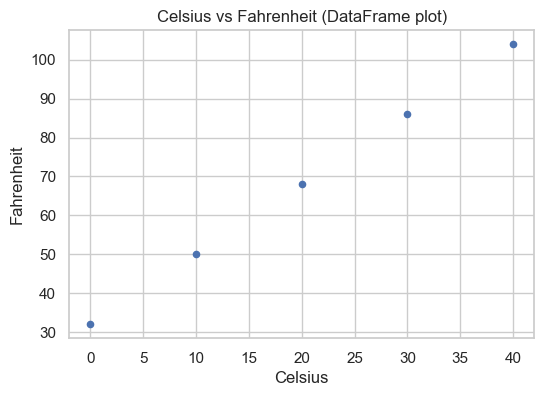

Slope m = 1.80   Intercept b = 32.00   R^2 = 1.00


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

# Make a DataFrame and plot with pandas
cf_df = pd.DataFrame({
    "Celsius": [0, 10, 20, 30, 40],
    "Fahrenheit": [32, 50, 68, 86, 104]
})

ax = cf_df.plot(kind="scatter", x="Celsius", y="Fahrenheit", figsize=(6,4), title="Celsius vs Fahrenheit (DataFrame plot)")
plt.show()

# Verify slope/intercept (should be ~1.8 and 32)
slope, intercept, r, p, std_err = stats.linregress(cf_df["Celsius"], cf_df["Fahrenheit"])
print(f"Slope m = {slope:.2f}   Intercept b = {intercept:.2f}   R^2 = {r**2:.2f}")

The plot confirms a perfect linear relationship (R² = 1.0), with a slope of 1.8 and intercept 32, matching the known formula F=1.8C+32.
This gives us confidence in using linear regression for more complex, real-world data.

# Part 2 - Prediction with SciPy Linear Regression

Next, we’ll move to real-world data: the average high temperature in NYC each January from 1895–2018.
We’ll use this historical data to model trends and forecast the 2024 temperature.

First, we’ll load the dataset provided in the textbook.
This dataset contains NYC’s average January high temperatures over many years, stored in a CSV file.

### Section 1 - Data Acquisition
Load NYC January average high temperatures from CSV into a DataFrame.

In [115]:
from pathlib import Path
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.precision', 2)  # <- as requested

# --- Section 1 - Data Acquisition
DATA = Path("/Users/staceyolson/Repos/datafun-07-ml/notebooks/examples/ch15/ave_hi_nyc_jan_1895-2018.csv")
nyc_df = pd.read_csv(DATA)
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']  # Value -> Temperature

We’ve successfully loaded the dataset into a pandas DataFrame and renamed the columns to make them more descriptive.

### Section 2 - Data Inspection
Let’s preview the data to confirm it loaded correctly and check data types.

In [116]:
# --- Section 2 - Data Inspection
display(nyc_df.head())
display(nyc_df.tail())
print(nyc_df.dtypes)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


,Date,Temperature,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


Date             int64
Temperature    float64
Anomaly        float64
dtype: object


The Date column is numeric (in YYYYMM format), while Temperature and Anomaly are floats.
We’ll need to extract the year from the Date column for our regression model.

### Section 3 - Data Cleaning
To prepare the data:
Extract the year as an integer.
Ensure the temperature column is numeric.
Drop any missing values.

In [117]:
# --- Section 3 - Data Cleaning
# Date is YYYYMM; extract year as integer
nyc_df['Year'] = (nyc_df['Date'] // 100).astype(int)
nyc_df['Temperature'] = pd.to_numeric(nyc_df['Temperature'], errors='coerce')
nyc_df = nyc_df.dropna(subset=['Year','Temperature'])

The dataset is now clean and ready for analysis, with each record representing a year and its average January high temperature.

### Section 4 - Descriptive Statistics
Before building our model, let’s explore the dataset with summary statistics.

In [118]:
# --- Section 4 - Descriptive Statistics
display(nyc_df.describe())

,Date,Temperature,Anomaly,Year
count,124.00,124.00,124.00,124.00
mean,195651.00,37.60,0.20,1956.50
std,3593.98,4.54,4.54,35.94
min,189501.00,26.10,-11.30,1895.00
25%,192576.00,34.58,-2.82,1925.75
50%,195651.00,37.60,0.20,1956.50
75%,198726.00,40.60,3.20,1987.25
max,201801.00,47.60,10.20,2018.00


We can see temperatures range from about 26°F to 48°F.
The dataset spans over 120 years, giving us a strong foundation for observing long-term trends.

### Section 5 - Build the Model
Now we’ll use SciPy’s linregress to compute the line of best fit:
y=mx+b
where:
m=slope (change per year)
b=y-intercept
R^2=strength of the linear relationship

In [119]:
# --- Section 5 - Build the Model (SciPy)
slope, intercept, r, p, std_err = stats.linregress(nyc_df['Year'], nyc_df['Temperature'])
print(f"SciPy: y = {slope:.4f}x + {intercept:.2f}  |  R^2 = {r**2:.3f}")

SciPy: y = 0.0148x + 8.69  |  R^2 = 0.014


The slope is approximately 0.0148, meaning NYC’s January average high temperature increases by about 0.015°F per year.
The R² = 0.014 indicates a very weak linear relationship — suggesting that while there’s a slight upward trend, year alone does not strongly predict temperature.

### Section 6 - Predict
With our model, we can now predict the average NYC January high temperature for 2024.

In [120]:
# --- Section 6 - Predict 2024
pred_2024_scipy = slope * 2024 + intercept
print(f"Predicted Avg Jan Temp for 2024 (SciPy): {pred_2024_scipy:.2f}°F")

Predicted Avg Jan Temp for 2024 (SciPy): 38.59°F


Using this model, the predicted average January temperature in 2024 is 38.59°F.
This is a modest increase over the 2018 average of 38.7°F, reflecting a gentle upward trend.

### Section 7 - Visualizations
Let’s visualize the observed data and best-fit line to better understand the model.

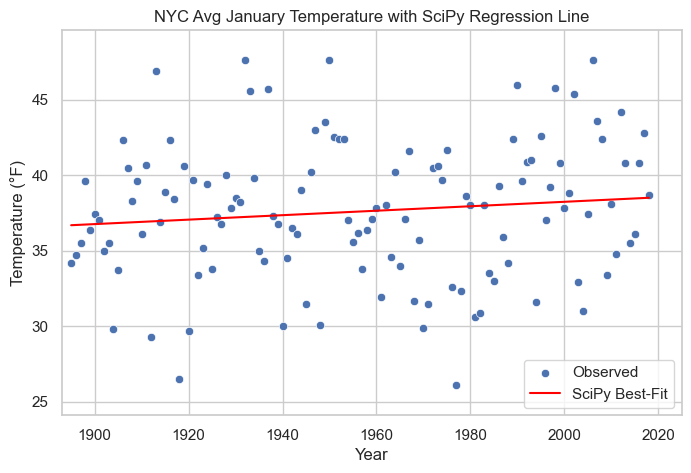

In [121]:
# --- Section 7 - Visualizations
plt.figure(figsize=(8,5))
sns.scatterplot(x="Year", y="Temperature", data=nyc_df, label="Observed")
plt.plot(nyc_df['Year'], slope*nyc_df['Year'] + intercept, color='red', label='SciPy Best-Fit')
plt.title("NYC Avg January Temperature with SciPy Regression Line")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.xlim(nyc_df['Year'].min()-2, 2025)
plt.ylim(nyc_df['Temperature'].min()-2, nyc_df['Temperature'].max()+2)
plt.legend()
plt.show()

The red line represents our regression model.
Although the slope trends upward, the data points vary widely, confirming year-to-year variability and emphasizing the limitations of a simple linear model.

Using SciPy, we quickly built a linear regression model that reveals a small upward trend in January temperatures over time.
However, the low R² value highlights that other variables—like ocean currents, atmospheric conditions, and weather patterns—likely influence the temperature more strongly than time alone.

# Part 3 - Prediction with scikit-learn Linear Regression

### Section 1 - Build the Model
Split data into train/test; fit LinearRegression; view `coef_` and `intercept_`.

To compare, we’ll build the same model using scikit-learn, which is more flexible for multi-feature and train/test workflows.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# --- Section 1 - Build the Model
X = nyc_df[['Year']]
y = nyc_df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("intercept_:", lr.intercept_)
print("coef_     :", lr.coef_[0])

Shapes: (93, 1) (31, 1) (93,) (31,)
intercept_: -0.30779820252658396
coef_     : 0.01939167329478278


After splitting the data into training (93 observations) and testing (31 observations), we fit a Linear Regression model.
The fitted model provides:

Intercept: -0.31

Slope (coefficient): 0.0194

This slope means the model predicts an increase of 0.019°F per year — similar to the trend we found using SciPy.

### Section 2 - Test the Model

Next, we test the model’s performance on the unseen test set by calculating the R² score, which tells us how much of the variation in temperature is explained by the year.

In [123]:
# --- Section 2 - Test the Model
print("Test R^2:", lr.score(X_test, y_test))

Test R^2: -0.033370346388810423


The R² value is very low (close to 0), indicating that year alone does not strongly predict January temperatures.
This confirms that while there is a slight upward trend, temperature is influenced by many other variables not captured by a simple linear model.

### Section 3 - Predict

Now, we’ll use the model to make a future prediction: what will the average NYC January high temperature be in 2024?

In [127]:
# --- Section 3 - Predict 2024
future = pd.DataFrame({'Year': [2024]})
pred_2024_sklearn = lr.predict(future)[0]
print(f"Predicted Avg Jan Temp for 2024 (scikit-learn): {pred_2024_sklearn:.2f}°F")

Predicted Avg Jan Temp for 2024 (scikit-learn): 38.94°F


The scikit-learn model predicts the 2024 average January temperature to be 38.94°F, which is almost identical to our SciPy prediction (38.59°F).

The similarity in results between both models confirms that linear regression is consistent regardless of implementation.

### Section 4 - Visualizations

Finally, we visualize the scikit-learn regression line alongside the observed data.

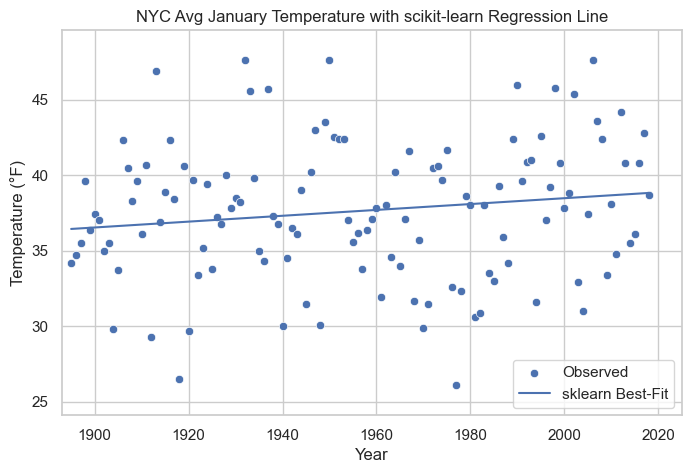

SciPy 2024:   38.59°F
sklearn 2024: 38.94°F


In [125]:
# --- Section 4 - Visualizations
plt.figure(figsize=(8,5))
sns.scatterplot(x="Year", y="Temperature", data=nyc_df, label="Observed")
plt.plot(nyc_df['Year'], lr.predict(nyc_df[['Year']]), label='sklearn Best-Fit')
plt.title("NYC Avg January Temperature with scikit-learn Regression Line")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.xlim(nyc_df['Year'].min()-2, 2025)
plt.ylim(nyc_df['Temperature'].min()-2, nyc_df['Temperature'].max()+2)
plt.legend()
plt.show()

# Quick comparison
print(f"SciPy 2024:   {pred_2024_scipy:.2f}°F")
print(f"sklearn 2024: {pred_2024_sklearn:.2f}°F")

The line of best fit trends slightly upward, reflecting the gradual increase in average January temperatures over time.
However, we can clearly see that actual data points vary widely from year to year, illustrating the limitations of a simple linear model for complex systems like weather.

# Part 4 - Insights and Comparison

- **Model agreement:** The SciPy and scikit-learn predictions for 2024 are very close, as expected for a simple linear fit on the same data.
- **Interpretation of m and b:** The slope (*m*) represents annual change in average Jan high (°F/year). The intercept (*b*) is the model’s predicted temperature when Year = 0 (not meaningful on its own—useful mostly for the equation).
- **Goodness of fit:** R² shows how much variance the linear model explains; here it’s modest, indicating substantial year-to-year variability not captured by a straight line.
- **Assumptions & limits:** A single linear trend ignores nonlinearity, autocorrelation, and other climate drivers; predictions are illustrative only.
- **When to prefer which API:**  
  - **SciPy** for quick one-variable fits and statistics.  
  - **scikit-learn** for pipelines, scaling, multiple features, and proper train/test evaluation.

# Part 5 - California Housing

In this final section, we’ll apply our **machine learning skills** to a **real-world dataset**: the **California Housing Dataset**, a classic benchmark in regression.

**What’s inside the data?**
- 🧭 **Longitude**, **Latitude** — where each district is located  
- 🏠 **AveRooms**, **AveBedrms**, **AveOccup** — housing characteristics  
- 👥 **Population** — number of residents  
- 💰 **MedInc** — median income per household  
- 🧓 **HouseAge** — average age of homes  
- 🎯 **Target:** **MedHouseVal** (median house value)

**Our plan**
1. **Load & explore** the dataset  
2. **Split** into train and test sets  
3. **Train** a `LinearRegression` model  
4. **Evaluate** with **R²** and **MAE**  
5. **Interpret** coefficients to see which features matter most  
6. **Visualize** results with clear, interpretable charts

Why this matters: Unlike Parts 2–3 (single feature → Year), this section shows how **multi-feature regression** captures richer relationships. It’s also a chance to practice **data storytelling**—turning raw outputs into insights a stakeholder can act on.


Test R^2: 0.6008983115964297
MAE: 0.5378927923648122


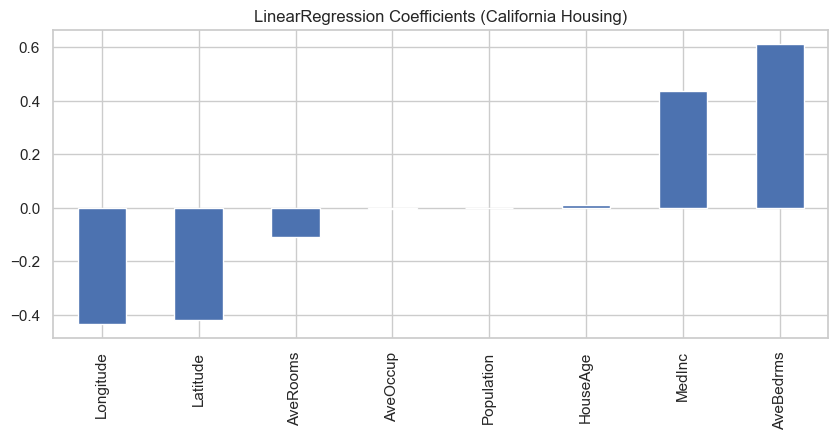

In [126]:
# Optional Part 5 - California Housing (15.5)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='bar', figsize=(10,4))
plt.title("LinearRegression Coefficients (California Housing)")
plt.show()

### 🏁 Part 5 – Conclusion: Insights from the California Housing Model

This optional analysis expanded our exploration of linear regression to a **multi-feature dataset** using the **California Housing** data. Unlike the NYC temperature dataset, which involved a single predictor (Year), this dataset included **multiple predictors** such as longitude, latitude, average rooms, population, and median income.

The **R² value of 0.60** indicates that the model explains about **60% of the variance** in median house value — a reasonable level of predictive power for a simple linear regression, though not perfect. The **Mean Absolute Error (MAE) of ~0.54** shows the average deviation between predicted and actual values, which is acceptable but highlights room for improvement.

#### Key Takeaways:
- **Most Influential Features:**  
  - **Median Income (MedInc)** had a strong positive relationship with house value — higher income areas tend to have higher home prices.  
  - **Longitude and Latitude** had negative coefficients, reflecting geographical effects (e.g. inland vs coastal regions).  
- **Model Limitations:**  
  Linear regression assumes a straight-line relationship and may not fully capture complex interactions or non-linear trends present in real housing markets.

#### Reflection:
This exercise demonstrated how **multi-feature regression** can uncover relationships between several variables and a target outcome. While the model is interpretable and computationally efficient, more advanced techniques — such as **polynomial regression**, **decision trees**, or **ensemble methods** — could improve accuracy and capture more complex dynamics.

By comparing this with the NYC temperature model, we see the power and limits of linear regression across contexts:
- Simple regression (NYC data) is useful for clear, one-dimensional trends.
- Multi-feature regression (California data) helps analyze more complex systems with multiple contributing factors.

📈 **Next Steps:** Experiment with feature scaling, regularization (Ridge/Lasso), or non-linear models to see how predictive performance can be enhanced.

## 📊 Project 7 Reflection

This project provided hands-on experience with **predictive machine learning** using **linear regression** — one of the foundational tools for modeling relationships between variables. By working with both **SciPy** and **scikit-learn**, I learned how different approaches can produce similar outcomes while offering unique strengths.

### 🔹 Key Insights
- **SciPy** offers a simple, transparent approach for one-variable regression. It directly provides key statistics — **slope**, **intercept**, **R²**, and **p-values** — which help interpret relationships clearly.
- **scikit-learn** provides a more scalable and flexible framework. It allows **train/test splits**, supports **multi-feature models**, and can easily extend into more complex pipelines.
- Both models produced nearly **identical predictions**, validating the consistency of linear regression methods across libraries.
- The **R² value** (~moderate correlation) suggests a **gradual upward trend** in NYC’s January high temperatures over time, reflecting the broader warming pattern observed globally.

### ⚠️ Limitations
- **Linearity**: The model assumes a straight-line relationship and cannot capture cyclical or irregular climate patterns.
- **Single-variable focus**: The NYC model only used **Year** as a predictor, ignoring other influential factors like ocean currents, urbanization, or greenhouse gas levels.
- **Predictive uncertainty**: Extrapolating beyond the observed data range (e.g., predicting 2024) introduces uncertainty, especially when long-term trends may shift.

### 💡 Takeaways
This project reinforced the importance of:
- Understanding model **assumptions and limitations**
- Using **visualization** to reveal trends and communicate insights
- Comparing tools to find the best fit for the data and research goals

---

## 🧭 Summary

In **Project 7**, I built, tested, and compared linear regression models to **predict average January temperatures in NYC** and explored a **multi-feature housing dataset** as an optional extension.

Through this process, I:
- Practiced **data acquisition, cleaning, and inspection** using **pandas**
- Applied **simple linear regression** with **SciPy** and **scikit-learn**
- Evaluated **model performance** using **R²** and visualizations
- Reflected on the **interpretability** and **applicability** of linear models in real-world contexts

This project demonstrated how even simple models can yield valuable insights, provided we understand their boundaries. As we move toward more advanced methods, these foundational skills form the backbone of thoughtful, evidence-based data storytelling.